### Importing Libraries & Data Reading

In [ ]:
import pandas as pd
df = pd.read_excel("/Users/tevfikerkut/Downloads/Classeur1.xlsx")
df["Classeur"] = 1
for i in range(2,21):
    name = "Classeur" + str(i)
    temp_df = pd.read_excel("/Users/tevfikerkut/Downloads/{}.xlsx".format(name))
    temp_df.drop(columns = ["I", "SOC_init"])
    temp_df["Classeur"] = int(i)
    df = pd.concat([df, temp_df])
    print(df.shape)
df = df.drop(columns = ["I", "SOC_init"])

#df.to_csv("maysas_df.csv", index = False)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("maysas_df.csv")

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Exploratary Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547172 entries, 0 to 15547171
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   tension   float64
 1   courant   float64
 2   SOC       float64
 3   capacite  float64
 4   Classeur  int64  
dtypes: float64(4), int64(1)
memory usage: 593.1 MB


In [3]:
df.isna().sum()

tension     0
courant     0
SOC         0
capacite    0
Classeur    0
dtype: int64

Our dataset seems pretty clear!

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tension,15547172.0,0.033314,0.000399,0.031701,0.033242,0.033485,0.033550,0.033551
courant,15547172.0,0.046916,0.334231,-1.230000,0.070820,0.169207,0.200000,0.200000
SOC,15547172.0,0.689544,0.190288,-1.230000,0.601905,0.726037,0.835051,0.883629
capacite,15547172.0,38.058928,2.288053,34.850000,36.900000,38.950000,41.000000,41.000000
Classeur,15547172.0,10.190446,5.757165,1.000000,5.000000,10.000000,15.000000,20.000000


### Let's add some visualizations for better understanding our dataset

#### Tension Plot

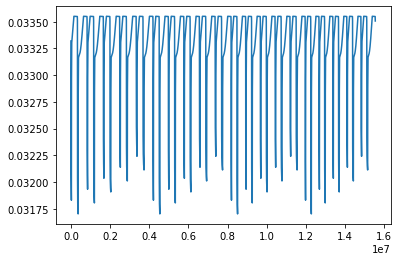

In [5]:
plt.plot(df.tension)

#### Courant Plot

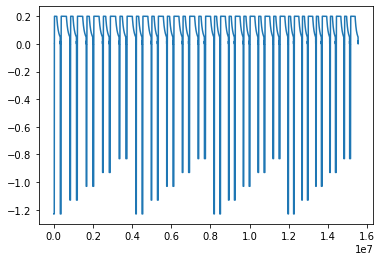

In [6]:
plt.plot(df.courant)

#### Capacité Plot

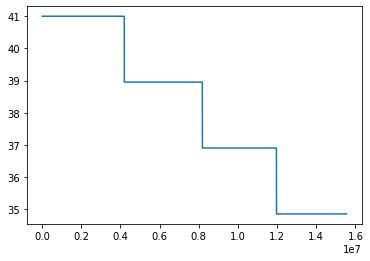

In [14]:
plt.plot(df.capacite)

#### SOC Plot

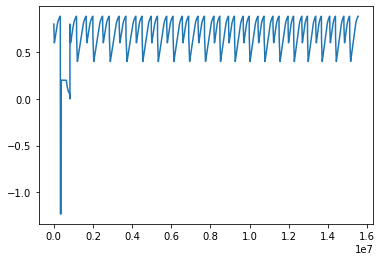

In [8]:
plt.plot(df.SOC)

#### Correlation Matrix Plot

In [9]:
import numpy as np
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,tension,courant,SOC,capacite,Classeur
tension,1.000000,0.845228,0.474460,0.000288,-0.001579
courant,0.845228,1.000000,0.133286,0.000338,-0.000744
SOC,0.474460,0.133286,1.000000,-0.131875,0.162282
capacite,0.000288,0.000338,-0.131875,1.000000,-0.969328
Classeur,-0.001579,-0.000744,0.162282,-0.969328,1.000000


It seems like there is a correlation between capacite and SOC

## Building Models

In [12]:
X = df.drop(["capacite", "Classeur"],1)
y = df.capacite

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = .2, random_state = 42)

### LightGBM 

In [13]:
import lightgbm as lgbm

model = lgbm.LGBMRegressor(objective = "regression")
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [14]:
lgbm_mse = mean_squared_error(preds, y_test)
lgbm_mape = mean_absolute_percentage_error(preds, y_test)
lgbm_mae = mean_absolute_error(preds, y_test)

In [15]:
print("Mean absolute error is {}".format(lgbm_mae))
print("Mean absolute percentage error is {}".format(lgbm_mape))
print("Mean squared error is {}".format(lgbm_mse))

Mean absolute error is 1.2101853021569464
Mean absolute percentage error is 0.031879311686975206
Mean squared error is 2.8398366307715377


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 3, n_estimators= 20)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
rf_mse = mean_squared_error(preds, y_test)
rf_mape = mean_absolute_percentage_error(preds, y_test)
rf_mae = mean_absolute_error(preds, y_test)

In [17]:
print("Mean absolute error is {}".format(rf_mae))
print("Mean absolute percentage error is {}".format(rf_mape))
print("Mean squared error is {}".format(rf_mse))

Mean absolute error is 1.938106490193307
Mean absolute percentage error is 0.05106343201274263
Mean squared error is 4.910515755583893


### CATBoost

In [19]:
import catboost as cat
model = cat.CatBoostRegressor(objective = "RMSE", verbose = 100)
model.fit(X_train, y_train)
preds = model.predict(X_test)

Learning rate set to 0.181614
0:	learn: 2.2587956	total: 664ms	remaining: 11m 3s
100:	learn: 1.7476352	total: 36.1s	remaining: 5m 21s
200:	learn: 1.7167133	total: 1m 11s	remaining: 4m 44s
300:	learn: 1.7094900	total: 1m 47s	remaining: 4m 8s
400:	learn: 1.7044520	total: 2m 23s	remaining: 3m 33s
500:	learn: 1.7005743	total: 2m 57s	remaining: 2m 56s
600:	learn: 1.6978703	total: 3m 32s	remaining: 2m 20s
700:	learn: 1.6954739	total: 4m 8s	remaining: 1m 45s
800:	learn: 1.6931049	total: 4m 44s	remaining: 1m 10s
900:	learn: 1.6915279	total: 5m 18s	remaining: 35s
999:	learn: 1.6903748	total: 5m 51s	remaining: 0us


In [22]:
cat_mse = mean_squared_error(preds, y_test)
cat_mape = mean_absolute_percentage_error(preds, y_test)
cat_mae = mean_absolute_error(preds, y_test)

In [23]:
print("Mean absolute error is {}".format(cat_mae))
print("Mean absolute percentage error is {}".format(cat_mape))
print("Mean squared error is {}".format(cat_mse))

Mean absolute error is 1.2335132449839408
Mean absolute percentage error is 0.03248405207284872
Mean squared error is 2.8608940340011233


### XGBoost

In [24]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [25]:
xgb_mse = mean_squared_error(preds, y_test)
xgb_mape = mean_absolute_percentage_error(preds, y_test)
xgb_mae = mean_absolute_error(preds, y_test)

In [26]:
print("Mean absolute error is {}".format(xgb_mae))
print("Mean absolute percentage error is {}".format(xgb_mape))
print("Mean squared error is {}".format(xgb_mse))

Mean absolute error is 1.926377869226247
Mean absolute percentage error is 0.050751936502511814
Mean squared error is 4.872943324209841


### ElasticNET

In [27]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
en_preds = model.predict(X_test)

In [28]:
en_mse = mean_squared_error(en_preds, y_test)
en_mape = mean_absolute_percentage_error(en_preds, y_test)
en_mae = mean_absolute_error(en_preds, y_test)

In [29]:
print("Mean absolute error is {}".format(en_mae))
print("Mean absolute percentage error is {}".format(en_mape))
print("Mean squared error is {}".format(en_mse))

Mean absolute error is 2.04362039609614
Mean absolute percentage error is 0.05369554940945343
Mean squared error is 5.237951617200455


### Model Comparison